In [1]:
import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')
import hvplot.pandas

## Cargo los cursos de coursera
#### No hay nulos
#### Me quedo solo con las columnas ['name','institution','course_id']
#### No hay nulos en la tabla

In [2]:
df_c = pd.read_csv(r"C:\Users\ornal\Desktop\Data Analitics\Test\Coursera_courses.csv");

In [3]:
df_c = df_c[['name','institution','course_id']]

In [4]:
df_c.isnull().sum()

name           0
institution    0
course_id      0
dtype: int64

## Cargo los reviews a los cursos de coursera

In [5]:
df_cr = pd.read_csv(r"C:\Users\ornal\Desktop\Data Analitics\Test\Coursera_reviews.csv");

In [6]:
df_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454571 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


#### La tabla tiene 55.5 MB
#### Hago cambios en los tipos de datos para mejorar

In [7]:
df_cr['reviewers'] = df_cr['reviewers'].astype('category')

In [8]:
df_cr['rating'] = df_cr['rating'].astype('int8')

In [9]:
df_cr['course_id'] = df_cr['course_id'].astype('category')

In [10]:
df_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype   
---  ------        --------------    -----   
 0   reviews       1454571 non-null  object  
 1   reviewers     1454711 non-null  category
 2   date_reviews  1454711 non-null  object  
 3   rating        1454711 non-null  int8    
 4   course_id     1454711 non-null  category
dtypes: category(2), int8(1), object(2)
memory usage: 42.2+ MB


#### Termino rebajandola a 42.2 MB
#### Creo un df llamado
###  df_cr_por_id
#### agrupado por course_id para contar la cantidad de reviews que ha tenido cada course_id

In [11]:
sr_cr_por_id = df_cr.groupby("course_id")["rating"].count()
df_cr_por_id = pd.DataFrame(sr_cr_por_id)
df_cr_por_id = df_cr_por_id.reset_index()
df_cr_por_id = df_cr_por_id.rename(columns={'rating':'cantidad'})

#### A partir de 
### df_cr_por_id
#### voy a obtener dos df llamados
### most_cr
### lest_cr
#### que son dos df ordenados de forma ascendente y descendente para tener a mano los id mas revisados y los id menos revisados

In [12]:
most_cr = df_cr_por_id.sort_values(by='cantidad', ascending=False, na_position='last')
lest_cr = df_cr_por_id.sort_values(by='cantidad', ascending=True, na_position='last')

In [77]:
edx = pd.read_csv(r"C:\Users\ornal\Desktop\Data Analitics\Test\edx.csv");

In [78]:
edx.columns

Index(['Unnamed: 0', 'title', 'n_enrolled', 'course_type', 'Level', 'subject',
       'language', 'course_effort', 'course_length', 'price'],
      dtype='object')

### Convertir la columna course_effort mas la columna course_length en horas que serian
### las horas necesarias para terminar el curso

In [79]:
# Split course_effort on " "
edx[['course_effort-split-0-5j95', 'course_effort-split-1-5j95', 'course_effort-split-2-5j95', 'course_effort-split-3-5j95']] = edx['course_effort'].str.split(' ', n=-1, expand=True, regex=None)
edx = edx[edx.columns[:8].tolist() + ['course_effort-split-0-5j95', 'course_effort-split-1-5j95', 'course_effort-split-2-5j95', 'course_effort-split-3-5j95'] + edx.columns[8:-4].tolist()]

# Split course_effort-split-0-5j95 on "-"
edx[['course_effort-split-0-5j95-split-0-671r']] = edx['course_effort-split-0-5j95'].str.split('-', n=-1, expand=True, regex=None)
edx = edx[edx.columns[:11].tolist() + ['course_effort-split-0-5j95-split-0-671r'] + edx.columns[11:-1].tolist()]

# Imported edx.csv
import pandas as pd
edx = pd.read_csv(r'edx.csv')

# Split course_effort on " "
edx[['course_effort-split-0-exqx', 'course_effort-split-1-exqx', 'course_effort-split-2-exqx', 'course_effort-split-3-exqx']] = edx['course_effort'].str.split(' ', n=-1, expand=True, regex=None)
edx = edx[edx.columns[:8].tolist() + ['course_effort-split-0-exqx', 'course_effort-split-1-exqx', 'course_effort-split-2-exqx', 'course_effort-split-3-exqx'] + edx.columns[8:-4].tolist()]

# Split course_effort-split-0-exqx on "-"
edx[['course_effort-split-0-exqx-split-0-jynp']] = edx['course_effort-split-0-exqx'].str.split('-', n=-1, expand=True, regex=None)
edx = edx[edx.columns[:11].tolist() + ['course_effort-split-0-exqx-split-0-jynp'] + edx.columns[11:-1].tolist()]

# Imported edx.csv
import pandas as pd
edx = pd.read_csv(r'edx.csv')

# Split course_effort on " "
edx[['course_effort-split-0-jyiu', 'course_effort-split-1-jyiu', 'course_effort-split-2-jyiu', 'course_effort-split-3-jyiu']] = edx['course_effort'].str.split(' ', n=-1, expand=True, regex=None)
edx = edx[edx.columns[:8].tolist() + ['course_effort-split-0-jyiu', 'course_effort-split-1-jyiu', 'course_effort-split-2-jyiu', 'course_effort-split-3-jyiu'] + edx.columns[8:-4].tolist()]

# Split course_effort-split-0-jyiu on "–"
edx[['course_effort-split-0-jyiu-split-0-o7o7', 'course_effort-split-0-jyiu-split-1-o7o7']] = edx['course_effort-split-0-jyiu'].str.split('–', n=-1, expand=True, regex=None)
edx = edx[edx.columns[:11].tolist() + ['course_effort-split-0-jyiu-split-0-o7o7', 'course_effort-split-0-jyiu-split-1-o7o7'] + edx.columns[11:-2].tolist()]

# Deleted columns course_effort-split-0-jyiu-split-0-o7o7
edx.drop(['course_effort-split-0-jyiu-split-0-o7o7'], axis=1, inplace=True)

# Deleted columns course_effort-split-0-jyiu
edx.drop(['course_effort-split-0-jyiu'], axis=1, inplace=True)

# Deleted columns course_effort
edx.drop(['course_effort'], axis=1, inplace=True)

# Deleted columns course_effort-split-3-jyiu
edx.drop(['course_effort-split-3-jyiu'], axis=1, inplace=True)

# Deleted columns course_effort-split-2-jyiu
edx.drop(['course_effort-split-2-jyiu'], axis=1, inplace=True)

# Deleted columns course_effort-split-1-jyiu
edx.drop(['course_effort-split-1-jyiu'], axis=1, inplace=True)

# Split course_length on " "
edx[['course_length-split-0-3xns', 'course_length-split-1-3xns']] = edx['course_length'].str.split(' ', n=-1, expand=True, regex=None)
edx = edx[edx.columns[:8].tolist() + ['course_length-split-0-3xns', 'course_length-split-1-3xns'] + edx.columns[8:-2].tolist()]

# Deleted columns course_length-split-1-3xns
edx.drop(['course_length-split-1-3xns'], axis=1, inplace=True)

# Deleted columns course_length
edx.drop(['course_length'], axis=1, inplace=True)

# Renamed columns horas
edx.rename(columns={'course_effort-split-0-jyiu-split-1-o7o7': 'horas'}, inplace=True)

# Renamed columns semanas
edx.rename(columns={'course_length-split-0-3xns': 'semanas'}, inplace=True)

edx.horas = edx.horas.astype('int16')
edx.semanas = edx.semanas.astype('int16')

edx['horas'] = edx.horas * edx.semanas

edx.drop(['semanas'], axis=1, inplace=True)

In [ ]:
edx

In [44]:
edx.isnull().sum()

title            0
n_enrolled       0
course_type      0
Level            0
subject          0
language         0
course_effort    0
course_length    0
price            0
dtype: int64

## Extraer el precio dentro de la cadena de texto de la columna price 
## y transformar esta columna en numerico entero

In [45]:
# Split price on "$"
edx[['price-split-0-rf65', 'price-split-1-rf65']] = edx['price'].str.split('$', n=-1, expand=True, regex=None)
edx = edx[edx.columns[:9].tolist() + ['price-split-0-rf65', 'price-split-1-rf65'] + edx.columns[9:-2].tolist()]

# Split price-split-1-rf65 on " "
edx[['price-split-1-rf65-split-0-6uec', 'price-split-1-rf65-split-1-6uec']] = edx['price-split-1-rf65'].str.split(' ', n=-1, expand=True, regex=None)
edx = edx[edx.columns[:11].tolist() + ['price-split-1-rf65-split-0-6uec', 'price-split-1-rf65-split-1-6uec'] + edx.columns[11:-2].tolist()]

# Deleted columns price-split-1-rf65-split-1-6uec
edx.drop(['price-split-1-rf65-split-1-6uec'], axis=1, inplace=True)

# Deleted columns price-split-1-rf65
edx.drop(['price-split-1-rf65'], axis=1, inplace=True)

# Deleted columns price-split-0-rf65
edx.drop(['price-split-0-rf65'], axis=1, inplace=True)

# Deleted columns price
edx.drop(['price'], axis=1, inplace=True)

# Renamed columns price
edx.rename(columns={'price-split-1-rf65-split-0-6uec': 'price'}, inplace=True)

# Changed price to dtype int
edx['price'] = edx['price'].astype('float16')

In [46]:
edx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855 entries, 0 to 854
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          855 non-null    object 
 1   n_enrolled     855 non-null    object 
 2   course_type    855 non-null    object 
 3   Level          855 non-null    object 
 4   subject        855 non-null    object 
 5   language       855 non-null    object 
 6   course_effort  855 non-null    object 
 7   course_length  855 non-null    object 
 8   price          855 non-null    float16
dtypes: float16(1), object(8)
memory usage: 55.2+ KB


In [81]:
edx.to_csv(r"C:\Users\ornal\Desktop\Data Analitics\Test\edx.csv")

In [17]:
udemy = pd.read_csv(r"C:\Users\ornal\Desktop\Data Analitics\Test\udemy_courses.csv");

In [18]:
udemy.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [ ]:
serie_institution = df.groupby("institution")["course_id"].count()
gby_institution = pd.DataFrame(serie_institution)
gby_institution = gby_institution.reset_index()

In [ ]:
gby_institution = gby_institution.rename(columns={'course_id':'cantidad'})

In [ ]:
best_institutions = gby_institution.sort_values(by='cantidad', ascending=False, na_position='last').head(10)
worst_institutions = gby_institution.sort_values(by='cantidad', ascending=True, na_position='last').head(10)

In [ ]:
import mitosheet
mitosheet.sheet(analysis_to_replay="id-xemjpqutoz")

In [ ]:
from mitosheet import *; register_analysis("id-xemjpqutoz");
    
# Sorted cantidad in descending order
gby_institution = gby_institution.sort_values(by='cantidad', ascending=False, na_position='last')

# Sorted cantidad in descending order
df_cr_por_id = df_cr_por_id.sort_values(by='cantidad', ascending=False, na_position='last')

# Imported edx_courses.csv
import pandas as pd
edx_courses = pd.read_csv(r'edx_courses.csv')

# Split price on " "
edx_precio[['price-split-0-qlb1', 'price-split-1-qlb1', 'price-split-2-qlb1', 'price-split-3-qlb1', 'price-split-4-qlb1', 'price-split-5-qlb1', 'price-split-6-qlb1']] = edx_precio['price'].str.split(' ', n=-1, expand=True, regex=None)
edx_precio = edx_precio[edx_precio.columns[:2].tolist() + ['price-split-0-qlb1', 'price-split-1-qlb1', 'price-split-2-qlb1', 'price-split-3-qlb1', 'price-split-4-qlb1', 'price-split-5-qlb1', 'price-split-6-qlb1'] + edx_precio.columns[2:-7].tolist()]

# Deleted columns price-split-0-qlb1
edx_precio.drop(['price-split-0-qlb1'], axis=1, inplace=True)

# Deleted columns price
edx_precio.drop(['price'], axis=1, inplace=True)

# Deleted columns price-split-6-qlb1
edx_precio.drop(['price-split-6-qlb1'], axis=1, inplace=True)

# Deleted columns price-split-4-qlb1
edx_precio.drop(['price-split-4-qlb1'], axis=1, inplace=True)

# Deleted columns price-split-3-qlb1
edx_precio.drop(['price-split-3-qlb1'], axis=1, inplace=True)

# Deleted columns price-split-2-qlb1
edx_precio.drop(['price-split-2-qlb1'], axis=1, inplace=True)

# Deleted columns price-split-1-qlb1
edx_precio.drop(['price-split-1-qlb1'], axis=1, inplace=True)

# Split price-split-5-qlb1 on "$"
edx_precio[['price-split-5-qlb1-split-0-sht3', 'price-split-5-qlb1-split-1-sht3']] = edx_precio['price-split-5-qlb1'].str.split('$', n=-1, expand=True, regex=None)
edx_precio = edx_precio[edx_precio.columns[:2].tolist() + ['price-split-5-qlb1-split-0-sht3', 'price-split-5-qlb1-split-1-sht3'] + edx_precio.columns[2:-2].tolist()]

# Deleted columns price-split-5-qlb1-split-0-sht3
edx_precio.drop(['price-split-5-qlb1-split-0-sht3'], axis=1, inplace=True)

# Deleted columns price-split-5-qlb1
edx_precio.drop(['price-split-5-qlb1'], axis=1, inplace=True)

# Renamed columns price
edx_precio.rename(columns={'price-split-5-qlb1-split-1-sht3': 'price'}, inplace=True)

# Imported udemy_courses.csv
import pandas as pd
udemy_courses = pd.read_csv(r'udemy_courses.csv')


In [22]:
idf = df_c.interactive()

In [23]:
df_c.name.value_counts()

Introduction to Psychology                                                2
Machine Learning                                                          1
Career 911: Your Future Job in Medicine and Healthcare                    1
Introduction to Trading, Machine Learning & GCP                           1
Python Programming: A Concise Introduction                                1
                                                                         ..
Building Scalable Java Microservices with Spring Boot and Spring Cloud    1
Introduction to Forensic Science                                          1
Google Cloud Product Fundamentals                                         1
American Contract Law I                                                   1
A Crash Course in Data Science                                            1
Name: name, Length: 622, dtype: int64

In [24]:
df_c.institution.value_counts()

University of Pennsylvania       43
University of Michigan           31
Duke University                  24
Google Cloud                     22
IBM                              18
                                 ..
EDHEC Business School             1
INSEAD                            1
Google - Spectrum Sharing         1
New York Institute of Finance     1
UCL School of Management          1
Name: institution, Length: 134, dtype: int64

In [25]:
edad_slider = pn.widgets.IntSlider(name='Grupos de Edades',start=1,end=10,step=1,value=1)
edad_slider

IntSlider(end=10, name='Grupos de Edades', start=1, value=1)

In [26]:
y_axis_tipo = pn.widgets.RadioButtonGroup(
    name='Genero',
    options=['Recomendados','Ventas','Costo'],
    button_type='success')
y_axis_tipo

RadioButtonGroup(button_type='success', name='Genero', options=['Recomendados', ...], value='Recomendados')

In [ ]:
departamentos = list(df_c.department.unique())
departamentos = ['todos'] + departamentos
departamentos

In [ ]:
doctores = list(df.doctor.unique())
doctores = ['todos'] + doctores
doctores

In [29]:
pn.pane.Markdown('''
# H1
## H2
### H3
#### H4
''')

Markdown(str)

PNG(str, width=200)
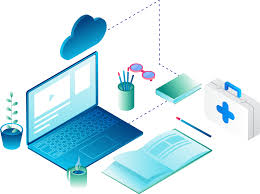

In [30]:
png = pn.panel('Images.png', width=200)

png

Column
    [0] PNG(str, width=200)
    [1] Markdown(str)
    [2] IntSlider(end=10, name='Grupos de Edades', start=1, value=1)
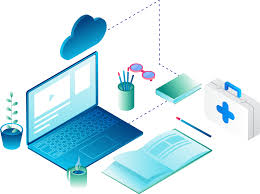

In [31]:
column = pn.Column(png)
column.append('\n')
column.append(edad_slider)
column

## Crear el Dashboard

FastListTemplate
    [js_area] HTML(None, height=0, margin=0, sizing_mode='fixed', width=0)
    [actions] TemplateActions()
    [busy_indicator] LoadingSpinner(height=20, width=20)
    [1589264502880] PNG(str, width=200)
    [1589270756800] Markdown(str)
    [1589223495408] IntSlider(end=10, name='Grupos de Edades', start=1, value=1)
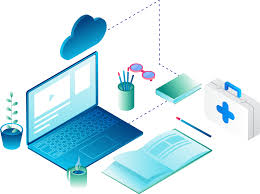

In [32]:
template = pn.template.FastListTemplate(
 title = 'Cursos Online',
 sidebar = column,
 main=[
   
 ]   
)
template.servable()